In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("car_insurance_claim.csv")

In [3]:
data.head().T

,0,1,2,3,4
ID,63581743,132761049,921317019,727598473,450221861
KIDSDRIV,0,0,0,0,0
BIRTH,16MAR39,21JAN56,18NOV51,05MAR64,05JUN48
AGE,60.0,43.0,48.0,35.0,51.0
HOMEKIDS,0,0,0,1,0
YOJ,11.0,11.0,11.0,10.0,14.0
INCOME,"$67,349","$91,449","$52,881","$16,039",NaN
PARENT1,No,No,No,No,No
HOME_VAL,$0,"$257,252",$0,"$124,191","$306,251"
MSTATUS,z_No,z_No,z_No,Yes,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [5]:
data.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [6]:
(data.isnull().sum()/len(data))*100

ID            0.000000
KIDSDRIV      0.000000
BIRTH         0.000000
AGE           0.067948
HOMEKIDS      0.000000
YOJ           5.319355
INCOME        5.532906
PARENT1       0.000000
HOME_VAL      5.581440
MSTATUS       0.000000
GENDER        0.000000
EDUCATION     0.000000
OCCUPATION    6.455057
TRAVTIME      0.000000
CAR_USE       0.000000
BLUEBOOK      0.000000
TIF           0.000000
CAR_TYPE      0.000000
RED_CAR       0.000000
OLDCLAIM      0.000000
CLM_FREQ      0.000000
REVOKED       0.000000
MVR_PTS       0.000000
CLM_AMT       0.000000
CAR_AGE       6.202679
CLAIM_FLAG    0.000000
URBANICITY    0.000000
dtype: float64

In [7]:
data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [8]:
age_mode= data['AGE'].mode()[0]
age_mode

46.0

In [9]:
data["AGE"]= data["AGE"].fillna(age_mode)

In [10]:
currency_columns = ['INCOME','HOME_VAL']
for col in currency_columns:
    data[col] = data[col].replace('[\$,]', '', regex = True).astype(float)

In [11]:
data.loc[data['YOJ'].isnull() & data['INCOME'].isnull(), ['YOJ', 'INCOME']] = 0

In [12]:
data.loc[data['YOJ'].isnull() & data['INCOME'].notnull(), 'YOJ'] = 1

In [13]:
income_Median = data['INCOME'].median()
data.loc[data['YOJ']>0 & data['INCOME'].isnull(), 'INCOME'] = income_Median

In [14]:
homeValu_median = data['HOME_VAL'].median()
homeValu_median

160661.0

In [15]:
data['HOME_VAL'] = data['HOME_VAL'].fillna(homeValu_median)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10302 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         10302 non-null  float64
 6   INCOME      10249 non-null  float64
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    10302 non-null  float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [17]:
data.loc[data['OCCUPATION'].isnull() & data['INCOME'] > 0,'OCCUPATION']="others"
data.loc[data['OCCUPATION'].isnull() & data['INCOME'].isnull(),'OCCUPATION']="unemployed"

In [18]:
carAge_mode = data['CAR_AGE'].mode()[0]

In [19]:
data['CAR_AGE']= data['CAR_AGE'].fillna(carAge_mode)

In [20]:
data['BIRTH'] = pd.to_datetime(data['BIRTH'], format="%d%b%y")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10302 non-null  int64         
 1   KIDSDRIV    10302 non-null  int64         
 2   BIRTH       10302 non-null  datetime64[ns]
 3   AGE         10302 non-null  float64       
 4   HOMEKIDS    10302 non-null  int64         
 5   YOJ         10302 non-null  float64       
 6   INCOME      10249 non-null  float64       
 7   PARENT1     10302 non-null  object        
 8   HOME_VAL    10302 non-null  float64       
 9   MSTATUS     10302 non-null  object        
 10  GENDER      10302 non-null  object        
 11  EDUCATION   10302 non-null  object        
 12  OCCUPATION  10301 non-null  object        
 13  TRAVTIME    10302 non-null  int64         
 14  CAR_USE     10302 non-null  object        
 15  BLUEBOOK    10302 non-null  object        
 16  TIF         10302 non-

In [22]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(numerical_cols)
print(categorical_cols)

['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG']
['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'REVOKED', 'CLM_AMT', 'URBANICITY']


In [23]:
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,2039-03-16,60.0,0,11.0,53329.0,No,0.0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,2056-01-21,43.0,0,11.0,53329.0,No,257252.0,z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,2051-11-18,48.0,0,11.0,53329.0,No,0.0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,2064-03-05,35.0,1,10.0,53329.0,No,124191.0,Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,2048-06-05,51.0,0,14.0,53329.0,No,306251.0,Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


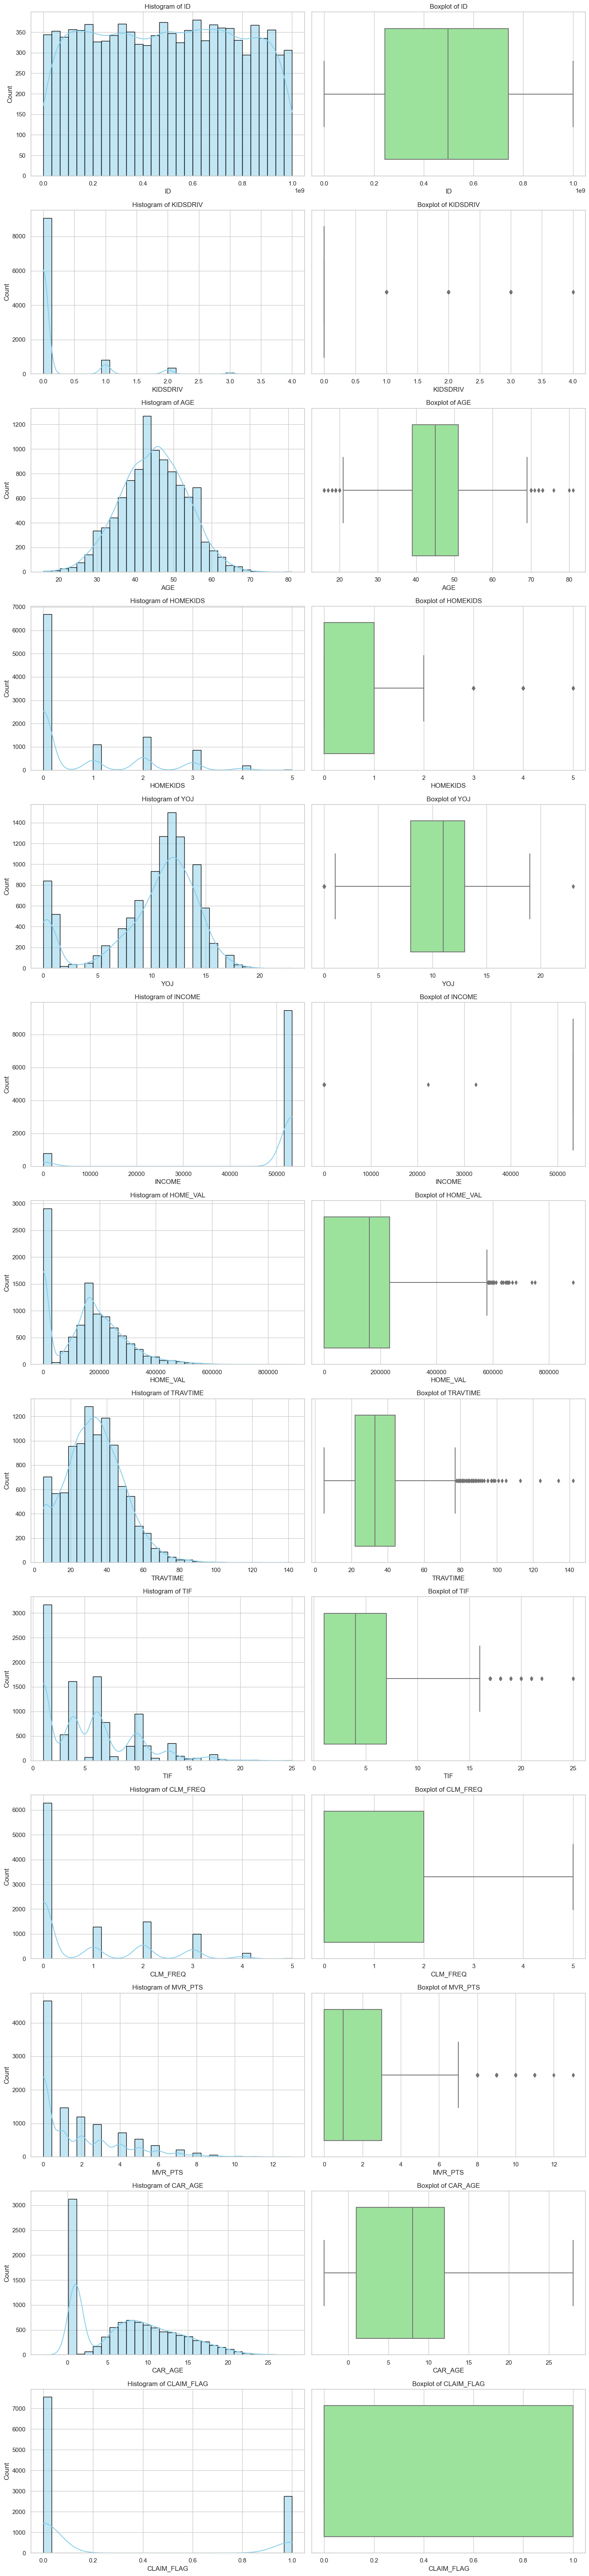

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize = (15, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2 * i + 1)
    sns.histplot(data[col],kde=True, bins = 30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")

    plt.subplot(len(numerical_cols), 2, 2 * i + 2)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

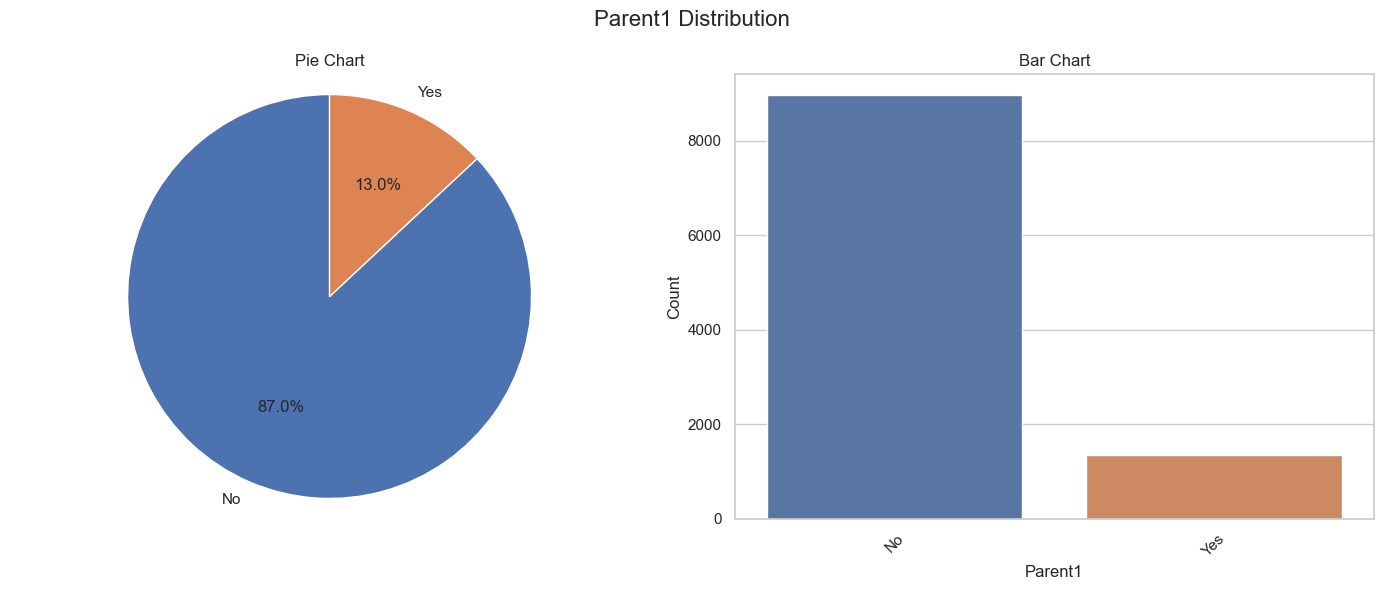

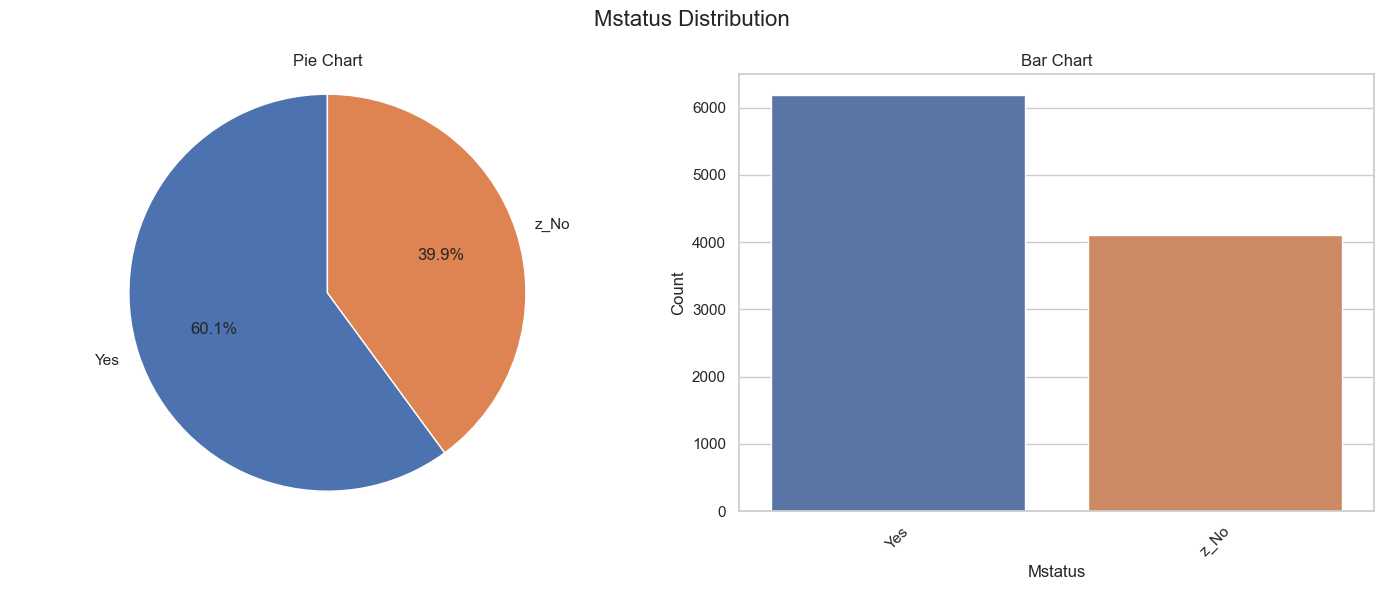

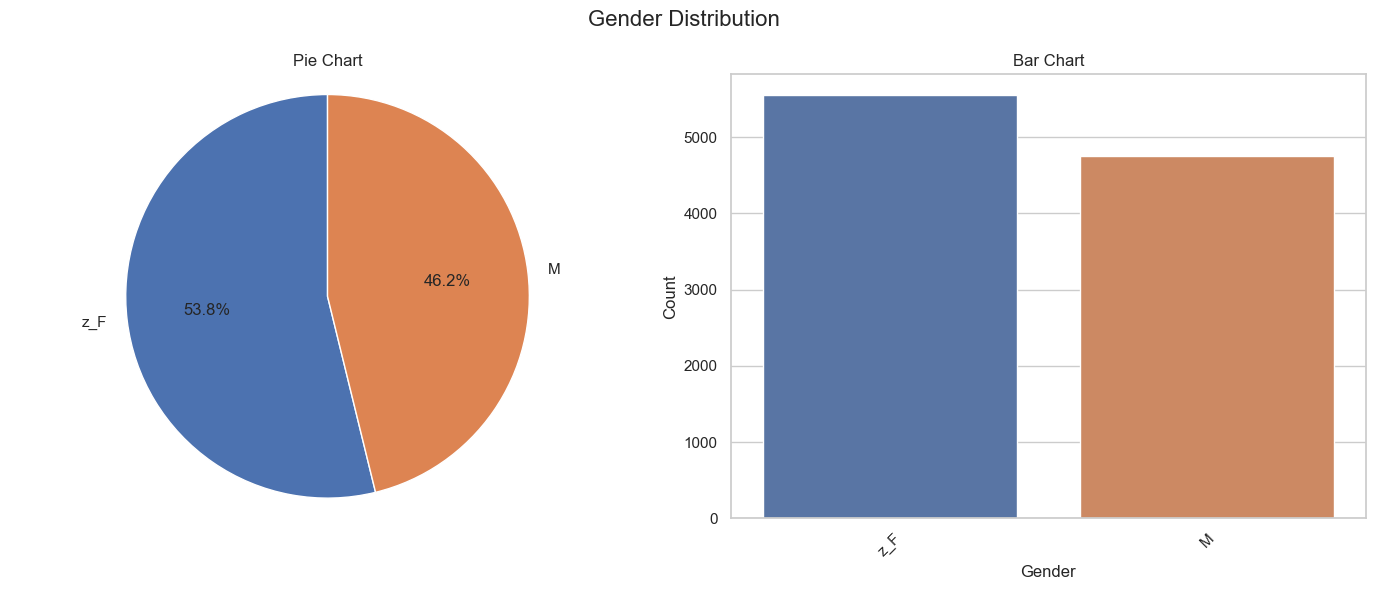

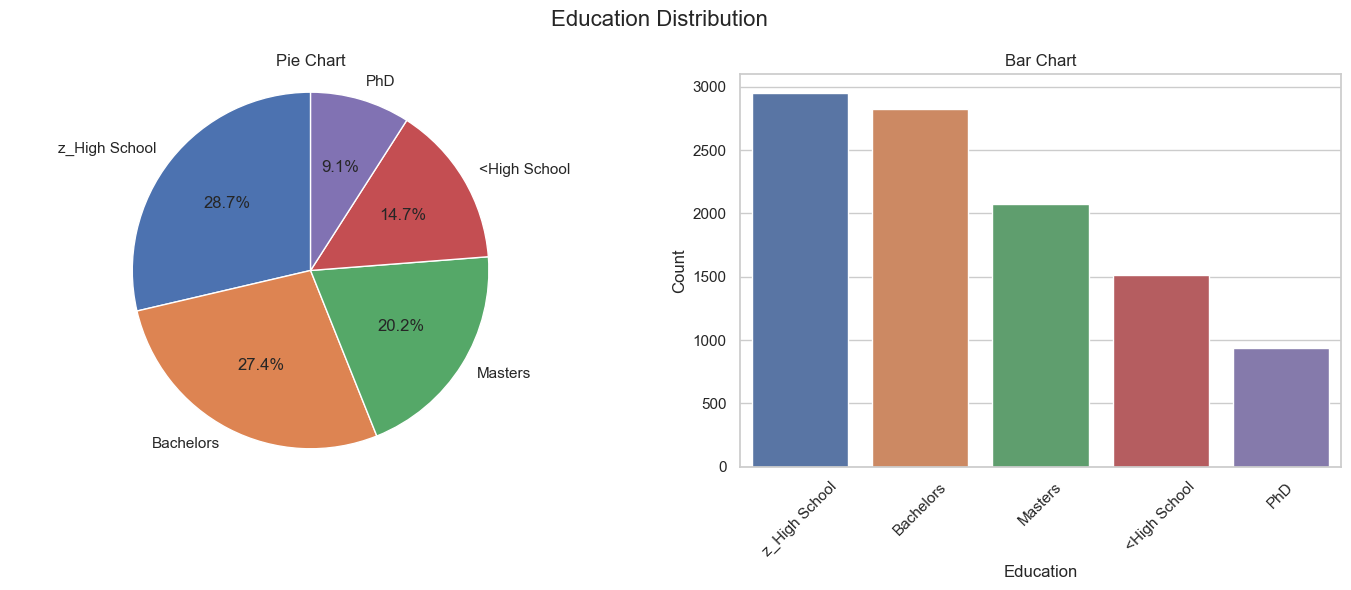

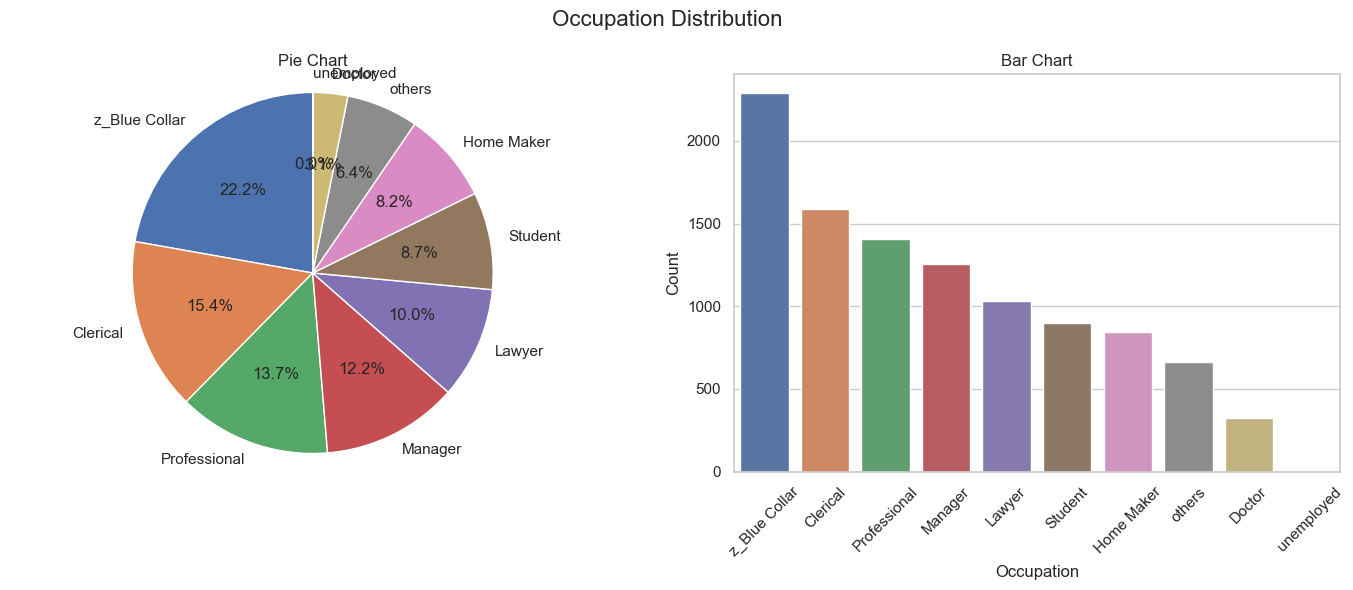

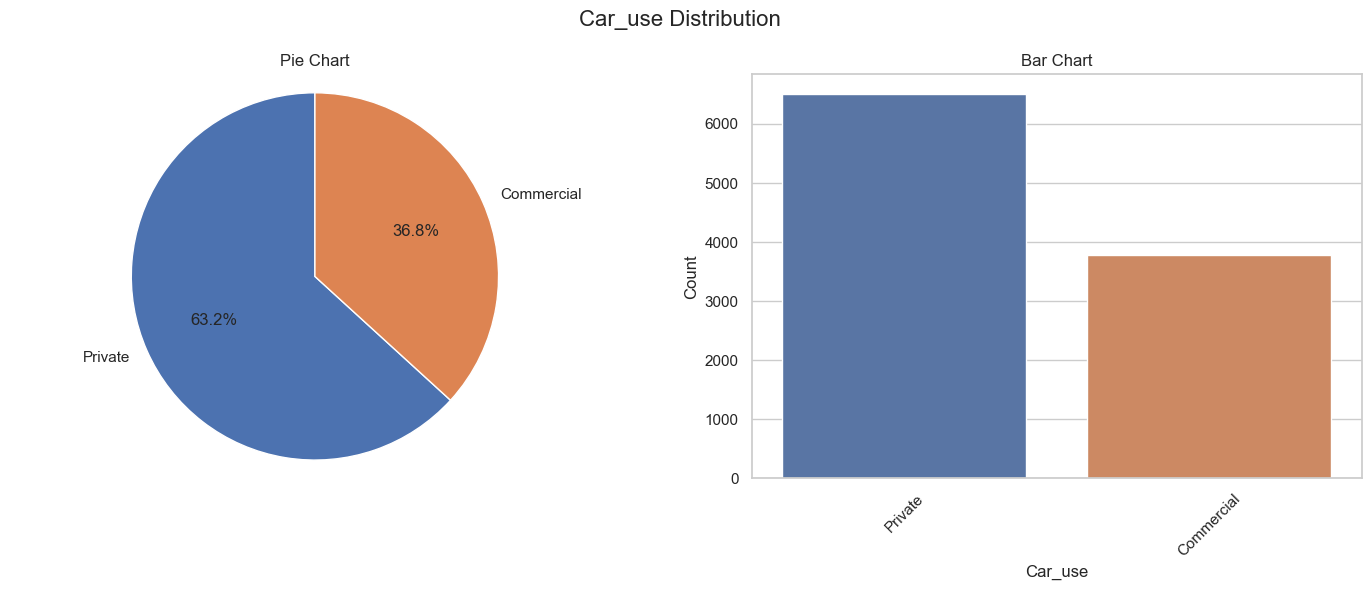

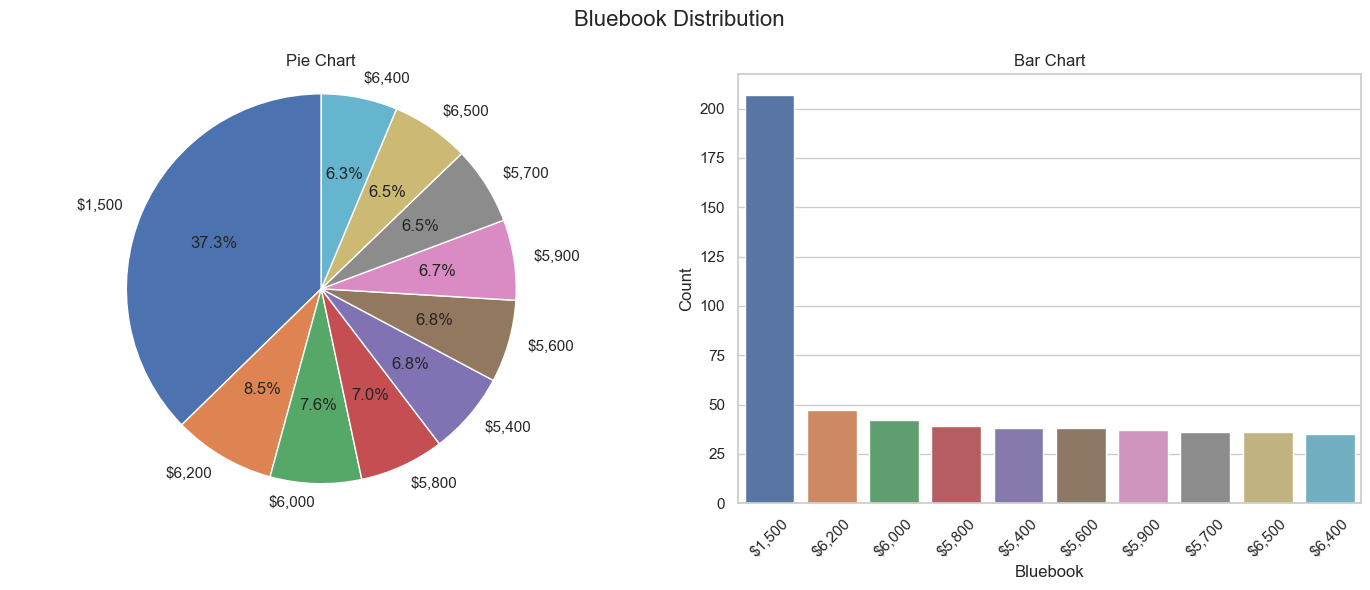

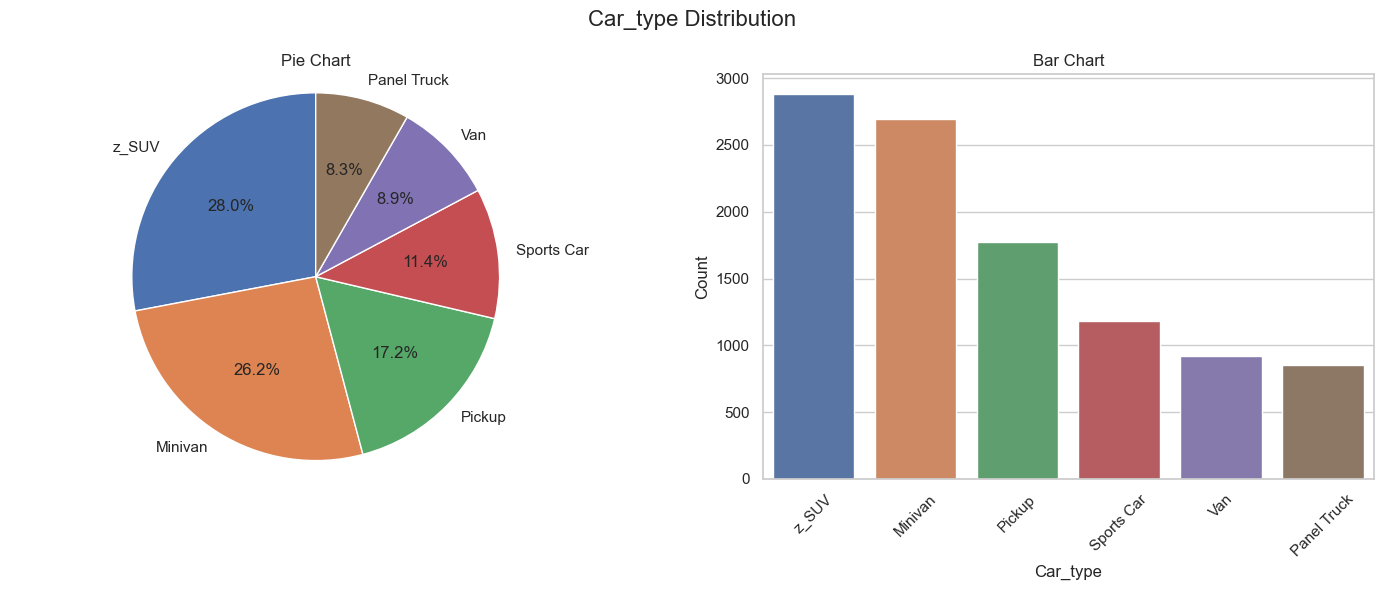

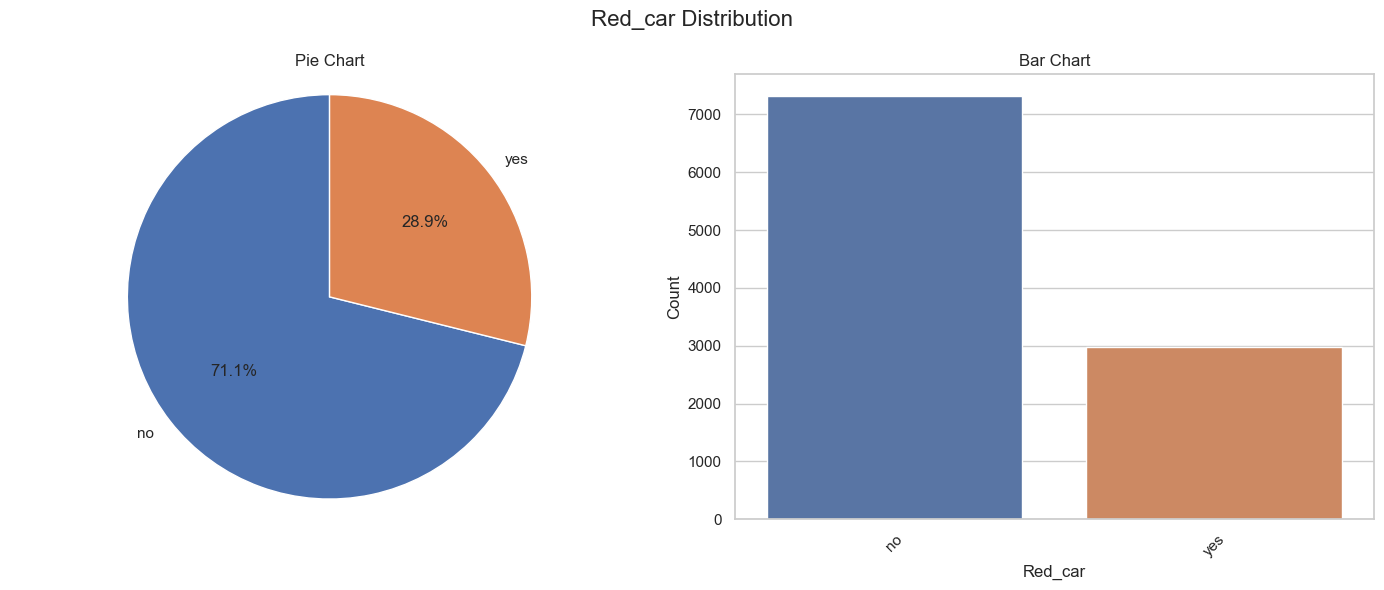

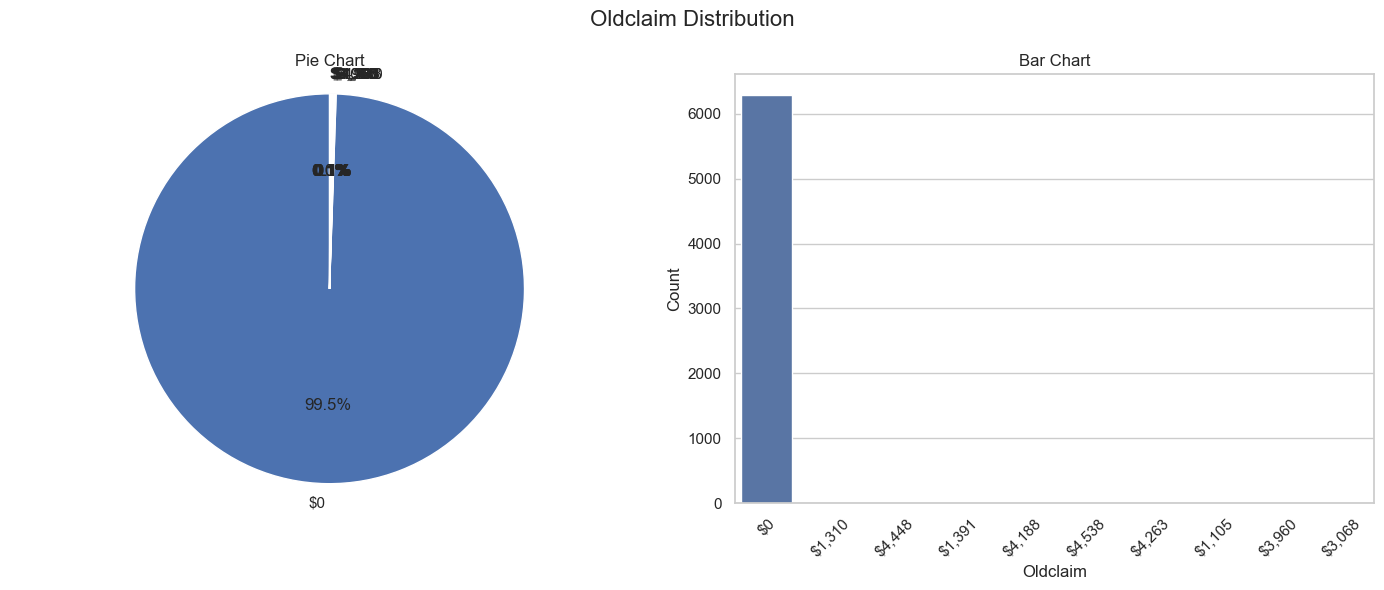

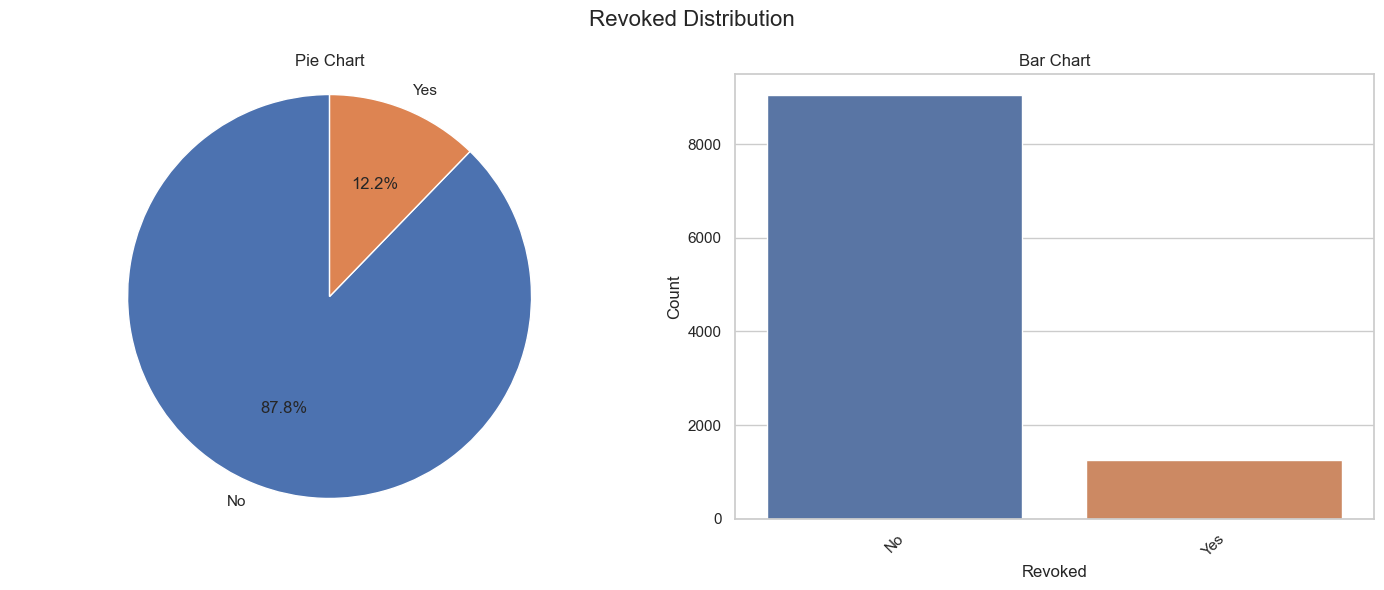

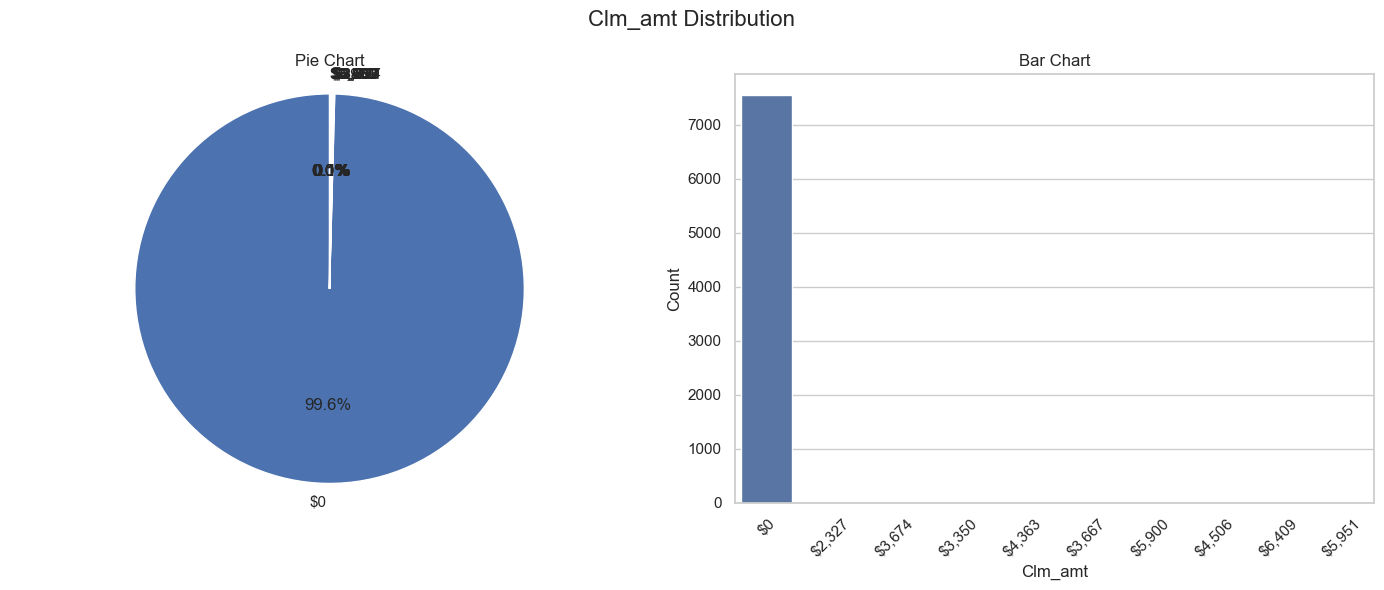

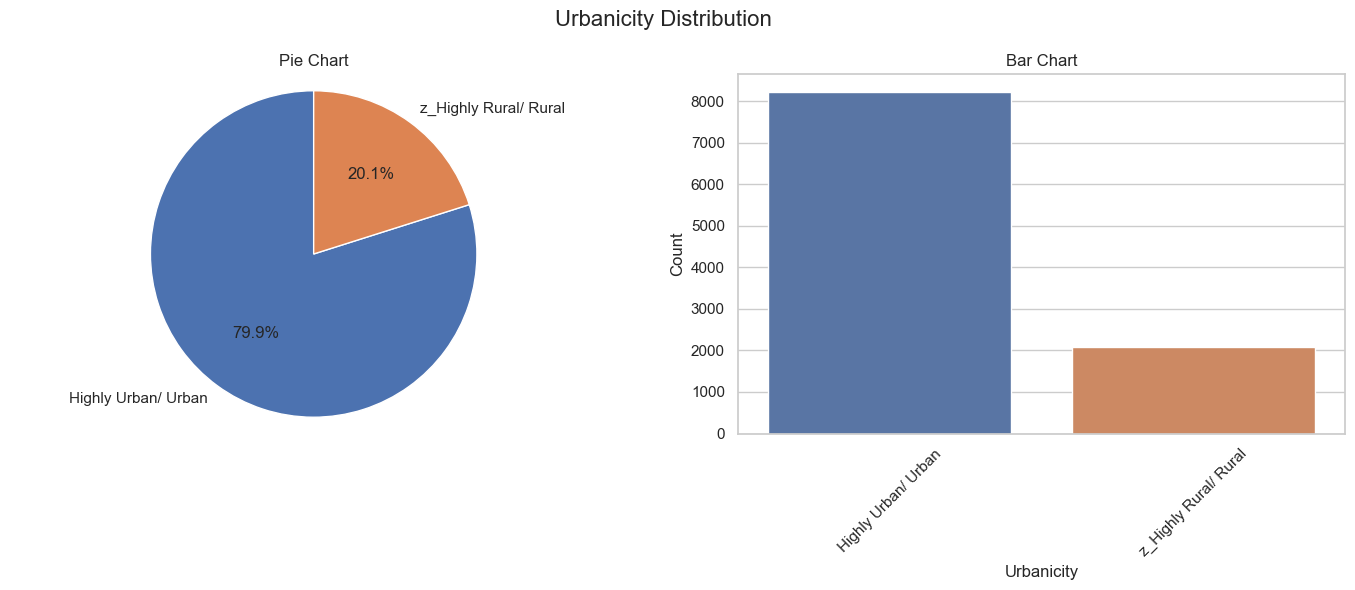

In [25]:
for col in categorical_cols:
    counts = data[col].value_counts().head(10)

    fig, axes = plt.subplots(1, 2 ,figsize=(14,6))
    fig.suptitle(f'{col.capitalize()} Distribution', fontsize=16)

    axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Pie Chart')
    axes[0].axis('equal')

    sns.barplot(x=counts.index, y = counts.values, ax=axes[1])
    axes[1].set_title('Bar Chart')
    axes[1].set_ylabel('Count')
    axes[1].set_xlabel(col.capitalize())
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [26]:
num_cols = data.select_dtypes(include='number')
correlation_matrix = num_cols.corr()
correlation_matrix

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
ID,1.000000,0.003508,-0.010411,0.009144,-0.012969,-0.008042,-0.014001,-0.002410,-0.010196,-0.001436,0.008391,-0.003233,-0.005938
KIDSDRIV,0.003508,1.000000,-0.078454,0.463653,0.034992,-0.010987,-0.015286,0.012207,-0.005830,0.038952,0.048424,-0.059749,0.108421
AGE,-0.010411,-0.078454,1.000000,-0.447417,0.115364,0.064233,0.203835,-0.001611,-0.001843,-0.037595,-0.075629,0.165211,-0.106758
HOMEKIDS,0.009144,0.463653,-0.447417,1.000000,0.064292,-0.071031,-0.104773,-0.000722,0.007509,0.038661,0.064294,-0.145576,0.123049
YOJ,-0.012969,0.034992,0.115364,0.064292,1.000000,0.644157,0.227948,-0.011745,0.023638,-0.019814,-0.036685,0.046744,-0.057196
INCOME,-0.008042,-0.010987,0.064233,-0.071031,0.644157,1.000000,0.240729,-0.021979,0.026320,-0.027515,-0.042577,0.083437,-0.079727
HOME_VAL,-0.014001,-0.015286,0.203835,-0.104773,0.227948,0.240729,1.000000,-0.034464,0.006526,-0.091226,-0.089452,0.198893,-0.180304
TRAVTIME,-0.002410,0.012207,-0.001611,-0.000722,-0.011745,-0.021979,-0.034464,1.000000,-0.013327,0.008274,0.009694,-0.027519,0.053283
TIF,-0.010196,-0.005830,-0.001843,0.007509,0.023638,0.026320,0.006526,-0.013327,1.000000,-0.017378,-0.031164,0.009706,-0.081225
CLM_FREQ,-0.001436,0.038952,-0.037595,0.038661,-0.019814,-0.027515,-0.091226,0.008274,-0.017378,1.000000,0.401413,-0.017167,0.222618


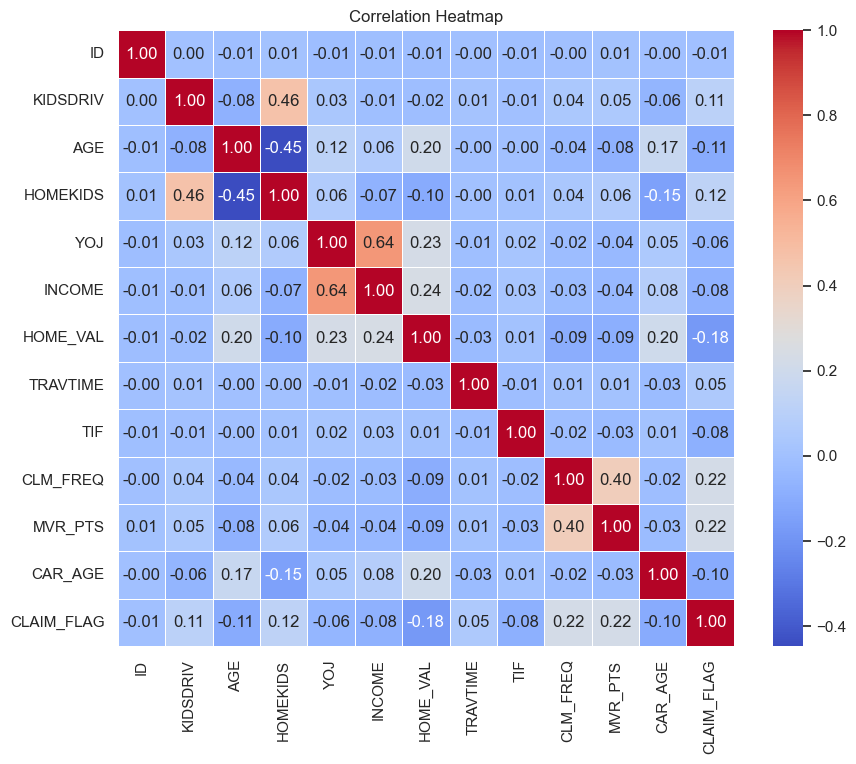

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap ='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
